<a href="https://colab.research.google.com/github/JTassinari10/456FinalCNN/blob/main/Oscar_Herrera_Project_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary python libraries
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2


The next following lines will create a connection to kaggle which will allow for direct dowload of the dataset

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/             #Uses Kaggle API token
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d prasunroy/natural-images

 94% 321M/342M [00:01<00:00, 240MB/s]
100% 342M/342M [00:01<00:00, 191MB/s]


In [5]:
%%capture 
!unzip natural-images.zip  #Unzips images from zip folder

The next lines will convert the Natural images data into the appropriate format to feed into the neural network. 


In [6]:
cv2.imread('natural_images/person/person_0928.jpg').shape   # Checks the shape of a single image

(256, 256, 3)

In [7]:
labels =['airplane','car','cat','dog','flower','fruit','motorbike','person']  #Labels for the images are inputted manually but can also be extracted

In [8]:
X=[]   #Creates 2 variables X and Y which will contain the image in array form and the labels
y=[]
def New_data():
  for category in labels:  
    path = os.path.join('/content/data/natural_images',category)  
    classes = labels.index(category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img)) 
        new_array = cv2.resize(img_array, (150, 150))
        X.append(new_array)
        y.append(classes)
New_data()

In [9]:
X = np.array(X).reshape(-1, 150, 150, 3)  #Need to convert X into a Numpy array 

In [10]:
X.shape

(6899, 150, 150, 3)

In [11]:
y=np.array(y)           # y is also converted into Numpy array
y

array([0, 0, 0, ..., 7, 7, 7])

In [12]:
from sklearn.preprocessing import LabelEncoder    #Needed to convert the data in y into categorica; 
y_transf = LabelEncoder().fit_transform(y)
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_transf)

In [13]:
rand=np.arange(X.shape[0])    # Data needs to be shuffled
np.random.seed(25)
np.random.shuffle(rand)
X=X[rand]
y=y_cat[rand]

In [14]:
y     # Checking for appropriate format

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

The next lines divide the data into training, validation and testing


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)    #Using 10% as testing

In [16]:
x_train.shape     

(6209, 150, 150, 3)

In [17]:
len(y_train)

6209

In [18]:
x_train, x_valid = x_train[:-690], x_train[-690:]     #Creation of Validation set which will also be 10%
y_train, y_valid = y_train[:-690], y_train[-690:]

In [19]:
x_train.shape

(5519, 150, 150, 3)

In [20]:
x_valid.shape

(690, 150, 150, 3)

The following model is based on the demo from Dr. Zhang on building CNN's

In [21]:
cnn = tf.keras.models.Sequential( #initializing the CNN
[tf.keras.layers.Conv2D(32,(3,3), activation="relu",padding = "same",input_shape=x_train.shape[1:]), #Convolution 1
tf.keras.layers.MaxPool2D(2,2), #Pooling 1
tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding = "same"), #Convolution 2
tf.keras.layers.Dropout(0.5), #Dropout 1
tf.keras.layers.MaxPool2D(2,2), #Pooling 2
tf.keras.layers.Flatten(), #Flaterning
tf.keras.layers.Dense(units=64, activation="relu"),#Full Connection1
tf.keras.layers.Dropout(0.25), #Droput 2
tf.keras.layers.Dense(units=8, activation= "softmax")])#Output layer

In [22]:
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [24]:
history = cnn.fit(x_train, y_train, batch_size = 50, epochs=15, validation_data=(x_valid, y_valid))

Epoch 1/15
111/111 [==============================] - 17s 42ms/step - loss: 42.0843 - accuracy: 0.4869 - val_loss: 0.9839 - val_accuracy: 0.6826
Epoch 2/15
111/111 [==============================] - 4s 38ms/step - loss: 0.8449 - accuracy: 0.7217 - val_loss: 0.7061 - val_accuracy: 0.7783
Epoch 3/15
111/111 [==============================] - 4s 37ms/step - loss: 0.5446 - accuracy: 0.8146 - val_loss: 0.6937 - val_accuracy: 0.7855
Epoch 4/15
111/111 [==============================] - 4s 38ms/step - loss: 0.4162 - accuracy: 0.8639 - val_loss: 0.6726 - val_accuracy: 0.7783
Epoch 5/15
111/111 [==============================] - 4s 37ms/step - loss: 0.3149 - accuracy: 0.8942 - val_loss: 0.6771 - val_accuracy: 0.7841
Epoch 6/15
111/111 [==============================] - 4s 37ms/step - loss: 0.3243 - accuracy: 0.9034 - val_loss: 0.8570 - val_accuracy: 0.7609
Epoch 7/15
111/111 [==============================] - 4s 38ms/step - loss: 0.5235 - accuracy: 0.8384 - val_loss: 0.7580 - val_accuracy: 0.79

In [25]:
score = cnn.evaluate(x_test, y_test)

22/22 [==============================] - 1s 16ms/step - loss: 0.5479 - accuracy: 0.8536


In [26]:
print('Total loss on Testing Set:', score[0])

Total loss on Testing Set: 0.5479403138160706


In [27]:
print('Accuracy of Testing Set:', score[1])

Accuracy of Testing Set: 0.8536232113838196


Graphical representations of loss and accuracy

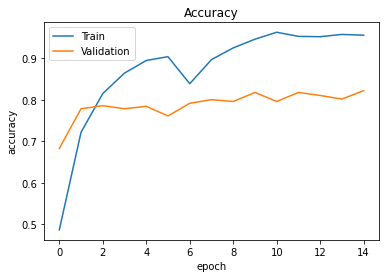

In [28]:
#Plot of training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


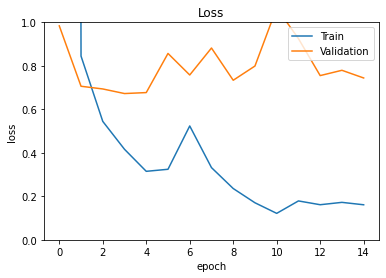

In [29]:
# Plot of training and validation loss
ax = plt.gca()
ax.set_ylim([0, 1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
